In [105]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
from bokeh.plotting import figure, show, output_file

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
suggested = pd.read_csv(os.path.join(project_root,'exp_result', 'exp_1_Dilyar.csv'))
baseline = pd.read_csv(os.path.join(project_root,'exp_result', 'exp_1-baseline_Dilyar.csv'))


In [106]:
suggested.columns

Index(['test_path', ' alpha', ' beta', ' total_weighted_sum',
       ' total_computation_time', ' total_pred_time', ' total_opti_time',
       ' self.precision*100 '],
      dtype='object')

In [107]:
baseline.columns

Index(['Baseline test_path', ' total_weighted_sum',
       ' total_computation_time '],
      dtype='object')

In [108]:
# print the unique values in the column test_path in suggested dataframe
print(suggested['test_path'].unique())

['./sample_data/artificial/testlog_0806_1_90.csv'
 './sample_data/artificial/testlog_0806_1_40.csv'
 './sample_data/artificial/testlog_0806_1_60.csv'
 './sample_data/artificial/testlog_0806_1_80.csv'
 './sample_data/artificial/testlog_0806_1_100.csv'
 './sample_data/artificial/testlog_0806_1_120.csv'
 './sample_data/artificial/testlog_0806_1_140.csv']


In [109]:
# create a new df for each unique value in the column test_path
# and append it to the list
suggested_list = {}
for i in suggested['test_path'].unique():
    suggested_list[i]= suggested[suggested['test_path'] == i]
baseline_list = {}
for i in baseline['Baseline test_path'].unique():
    baseline_list[i]= baseline[baseline['Baseline test_path'] == i]



In [110]:
def compare_methods(suggested, baseline):
  percentage_change = (suggested - baseline) / baseline * 100
  if percentage_change > 0:
    print(f" baseline is {percentage_change:.2f}% better than suggested")
  elif percentage_change < 0:
    print(f" suggested is {-percentage_change:.2f}% better than baseline")
  else:
    print("suggested and baseline are equally good")


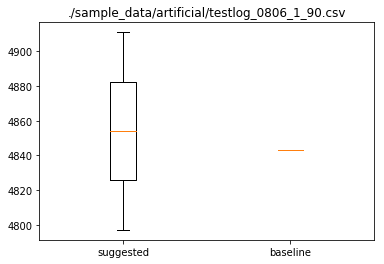

best case: 

 suggested is 0.95% better than baseline
worst case: 

 baseline is 1.40% better than suggested
avg case: 

 baseline is 0.23% better than suggested
best case:  0   -0.949824
Name:  total_weighted_sum, dtype: float64
worst case:  0    1.404088
Name:  total_weighted_sum, dtype: float64
avg case:  0    0.227132
Name:  total_weighted_sum, dtype: float64
best case alpha:  0.3
best case beta:  0.3
worst case alpha:  0.3
worst case beta:  0.3


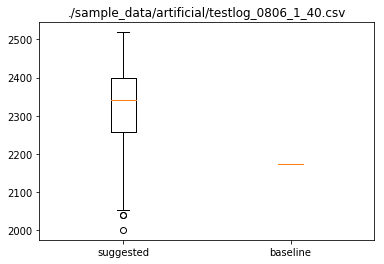

best case: 

 suggested is 8.00% better than baseline
worst case: 

 baseline is 15.82% better than suggested
avg case: 

 baseline is 6.20% better than suggested
best case:  1   -8.0
Name:  total_weighted_sum, dtype: float64
worst case:  1    15.816092
Name:  total_weighted_sum, dtype: float64
avg case:  1    6.198982
Name:  total_weighted_sum, dtype: float64
best case alpha:  0.0
best case beta:  0.9
worst case alpha:  0.4
worst case beta:  0.1


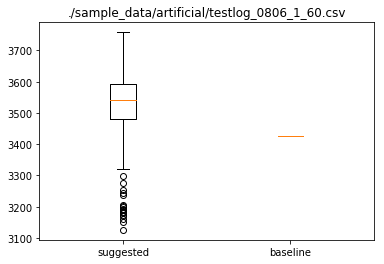

best case: 

 suggested is 8.78% better than baseline
worst case: 

 baseline is 9.66% better than suggested
avg case: 

 baseline is 2.17% better than suggested
best case:  2   -8.783192
Name:  total_weighted_sum, dtype: float64
worst case:  2    9.658594
Name:  total_weighted_sum, dtype: float64
avg case:  2    2.166977
Name:  total_weighted_sum, dtype: float64
best case alpha:  0.0
best case beta:  0.7
worst case alpha:  0.7
worst case beta:  0.1


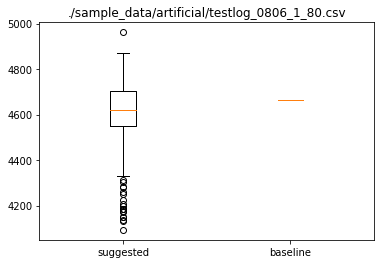

best case: 

 suggested is 12.26% better than baseline
worst case: 

 baseline is 6.37% better than suggested
avg case: 

 suggested is 1.68% better than baseline
best case:  3   -12.261522
Name:  total_weighted_sum, dtype: float64
worst case:  3    6.366559
Name:  total_weighted_sum, dtype: float64
avg case:  3   -1.676418
Name:  total_weighted_sum, dtype: float64
best case alpha:  0.0
best case beta:  0.2
worst case alpha:  0.2
worst case beta:  0.1


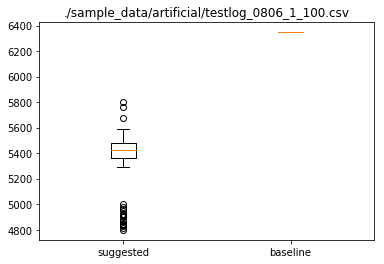

best case: 

 suggested is 24.42% better than baseline
worst case: 

 suggested is 8.63% better than baseline
avg case: 

 suggested is 15.68% better than baseline
best case:  4   -24.417139
Name:  total_weighted_sum, dtype: float64
worst case:  4   -8.63264
Name:  total_weighted_sum, dtype: float64
avg case:  4   -15.683912
Name:  total_weighted_sum, dtype: float64
best case alpha:  0.0
best case beta:  0.2
worst case alpha:  0.2
worst case beta:  0.1


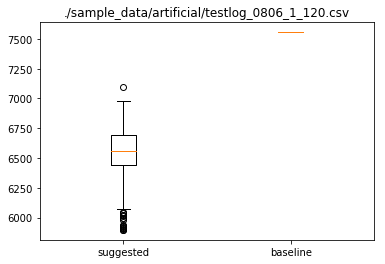

best case: 

 suggested is 21.96% better than baseline
worst case: 

 suggested is 6.06% better than baseline
avg case: 

 suggested is 13.77% better than baseline
best case:  5   -21.956061
Name:  total_weighted_sum, dtype: float64
worst case:  5   -6.061408
Name:  total_weighted_sum, dtype: float64
avg case:  5   -13.771381
Name:  total_weighted_sum, dtype: float64
best case alpha:  0.0
best case beta:  0.5
worst case alpha:  0.4
worst case beta:  0.1


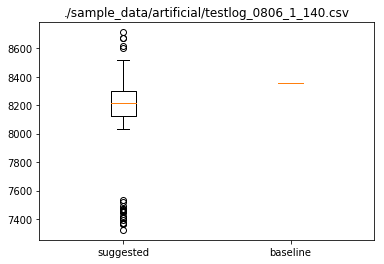

best case: 

 suggested is 12.37% better than baseline
worst case: 

 baseline is 4.24% better than suggested
avg case: 

 suggested is 2.77% better than baseline
best case:  6   -12.371381
Name:  total_weighted_sum, dtype: float64
worst case:  6    4.235463
Name:  total_weighted_sum, dtype: float64
avg case:  6   -2.76784
Name:  total_weighted_sum, dtype: float64
best case alpha:  0.0
best case beta:  0.0
worst case alpha:  1.0
worst case beta:  0.1


In [103]:
# for each key value pair in the dictionary, create a boxplot
for key, value in suggested_list.items():
    plt.figure()
    plt.title(key)
    plt.boxplot([value[' total_weighted_sum'], baseline_list[key][' total_weighted_sum']])
    plt.xticks([1,2], ['suggested', 'baseline'])
    plt.show()
    # calculate the best case and the worst case for the suggested incomparison to baseline in terms of percentage
    print('best case: \n')
    compare_methods(value[' total_weighted_sum'].min(), float(baseline_list[key][' total_weighted_sum']))
    print('worst case: \n')
    compare_methods(value[' total_weighted_sum'].max(), float(baseline_list[key][' total_weighted_sum']))
    print('avg case: \n')
    compare_methods(value[' total_weighted_sum'].mean(), float(baseline_list[key][' total_weighted_sum']))
    
    best_case = (value[' total_weighted_sum'].min() - baseline_list[key][' total_weighted_sum']) / baseline_list[key][' total_weighted_sum'] * 100
    worst_case = (value[' total_weighted_sum'].max() - baseline_list[key][' total_weighted_sum']) / baseline_list[key][' total_weighted_sum'] * 100
    avg_case = (value[' total_weighted_sum'].mean() - baseline_list[key][' total_weighted_sum']) / baseline_list[key][' total_weighted_sum'] * 100
    print('best case: ', best_case)
    print('worst case: ', worst_case)
    print('avg case: ', avg_case)
    # print the alpha and beta values for the best case, worst case 
    
    print('best case alpha: ', value[value[' total_weighted_sum'] == value[' total_weighted_sum'].min()][' alpha'].values[0])
    print('best case beta: ', value[value[' total_weighted_sum'] == value[' total_weighted_sum'].min()][' beta'].values[0])
    print('worst case alpha: ', value[value[' total_weighted_sum'] == value[' total_weighted_sum'].max()][' alpha'].values[0])
    print('worst case beta: ', value[value[' total_weighted_sum'] == value[' total_weighted_sum'].max()][' beta'].values[0])
    

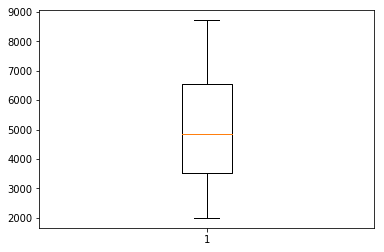

In [104]:
# create box plots from the column total_weighted_sum in the dataframe suggested where the test path is the same as the one in the baseline dataframe
plt.boxplot(suggested[' total_weighted_sum'])
plt.show()